In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [2]:
#loading the necessary data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#loading the data set
df = pd.read_csv("../input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv")
df.head()
len(df)

200

In [4]:
#removing not a number values
df.dropna()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<Figure size 1000x500 with 0 Axes>

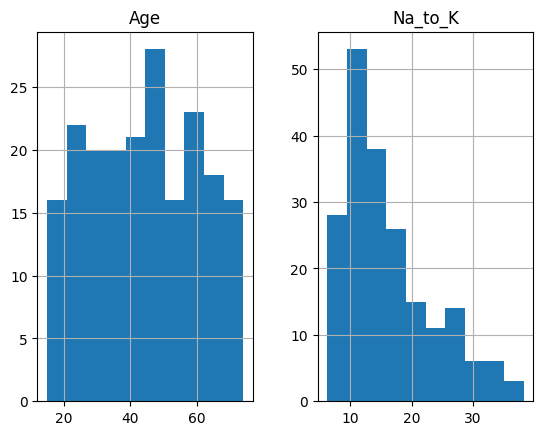

In [5]:
#Data Visualization
#bar plot for the data
fig = plt.figure(figsize = (10, 5))
 
# creating the hist plot
df.hist()
plt.show()

In [6]:
len(df)

200

In [7]:
#label encoding the dataset to convert str to floats
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column Sex BP Cholesterol Drug . 
df['Sex']= label_encoder.fit_transform(df['Sex']) 
df['BP']= label_encoder.fit_transform(df['BP']) 
df['Cholesterol']= label_encoder.fit_transform(df['Cholesterol']) 
df['Drug']= label_encoder.fit_transform(df['Drug']) 
  
df.tail()
# To delete the last 4 rows
N = 4  # Example: delete the last 4 rows
df = df.iloc[:-4]
df1= df.tail()


In [8]:
len(df)

196

In [9]:
#Importing Decision Tree libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib


In [10]:
#TRAIN TEST SPLIT THE DATA
X = df.drop(['Drug'],axis=1)
X.head()

from sklearn.preprocessing import LabelEncoder
# Assuming 'target_column' is the name of your target column
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(df['Drug'])
# using the train test split method to split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True) 

In [11]:
# Create a Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the model on the training set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# Make predictions on the test set
predictions = decision_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)

print(f"Decision Tree model accuracy on the test set: {accuracy:.2%}")
print(accuracy*100)


Decision Tree model accuracy on the test set: 97.50%
97.5


In [13]:
test2 = df1.drop('Drug',axis=1)
test2

,Age,Sex,BP,Cholesterol,Na_to_K
191,23,1,0,0,8.011
192,72,1,1,0,16.310
193,72,1,1,0,6.769
194,46,0,0,0,34.686
195,56,0,1,0,11.567


In [14]:
# Make predictions on the test set
prediction2 = decision_tree.predict(test2)
print(prediction2)

[0 4 2 4 2]


In [15]:
df1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
191,23,1,0,0,8.011,0
192,72,1,1,0,16.310,4
193,72,1,1,0,6.769,2
194,46,0,0,0,34.686,4
195,56,0,1,0,11.567,2


In [16]:
# Define data as a dictionary with different values
data = {
    'Age': [28, 65, 42, 59, 36, 47],  # Example ages
    'Sex': ['M', 'F', 'M', 'F', 'M', 'F'],  # F for female, M for male
    'BP': ['NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'LOW', 'LOW'],  # Blood pressure levels
    'Cholesterol': ['NORMAL', 'NORMAL', 'HIGH', 'LOW', 'HIGH', 'NORMAL'],  # Cholesterol levels
    'Na_to_K': [12.0, 8.5, 15.3, 10.2, 9.8, 14.2],  # Sodium to Potassium ratio
    'Drug': ['drugA', 'DrugY', 'drugB', 'drugA', 'drugB', 'DrugY']  # Prescribed drug
}

# Create DataFrame
df3 = pd.DataFrame(data)

# Display the DataFrame
print(df3)

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   28   M  NORMAL      NORMAL     12.0  drugA
1   65   F    HIGH      NORMAL      8.5  DrugY
2   42   M    HIGH        HIGH     15.3  drugB
3   59   F  NORMAL         LOW     10.2  drugA
4   36   M     LOW        HIGH      9.8  drugB
5   47   F     LOW      NORMAL     14.2  DrugY


In [17]:
#label encoding the dataset to convert str to floats
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column Sex BP Cholesterol Drug . 
df3['Sex']= label_encoder.fit_transform(df3['Sex']) 
df3['BP']= label_encoder.fit_transform(df3['BP']) 
df3['Cholesterol']= label_encoder.fit_transform(df3['Cholesterol']) 
df3['Drug']= label_encoder.fit_transform(df3['Drug']) 
test3 =df3.drop('Drug',axis=1)


In [18]:
# Make predictions on the test set
prediction3 = decision_tree.predict(test3)
print(prediction3)

[3 1 4 3 2 3]


In [19]:
df3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,28,1,2,2,12.0,1
1,65,0,0,2,8.5,0
2,42,1,0,0,15.3,2
3,59,0,2,1,10.2,1
4,36,1,1,0,9.8,2
5,47,0,1,2,14.2,0


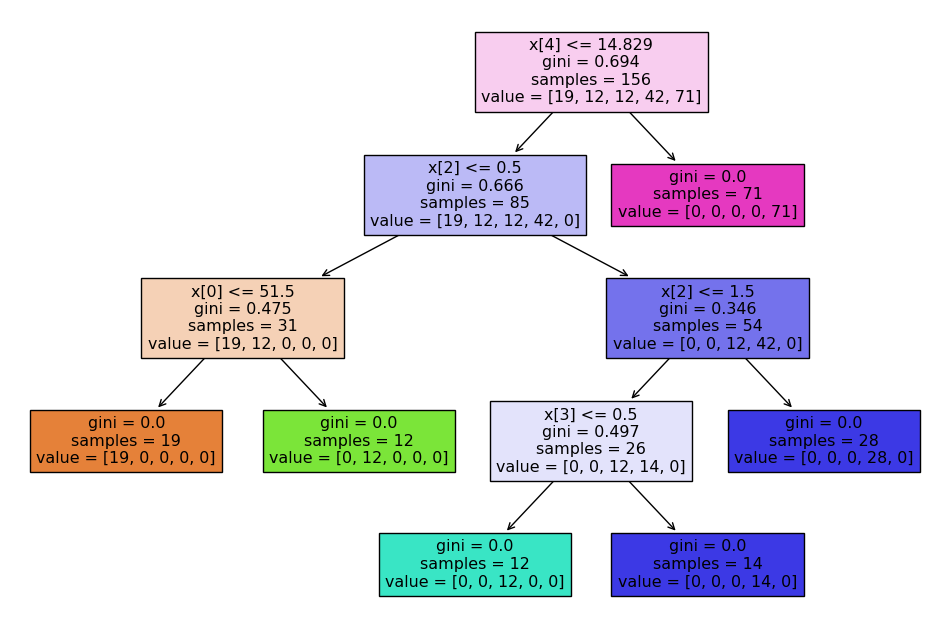

In [20]:
#visualization of the model 

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))
plot_tree(decision_tree,filled=True)
plt.show()
